In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing The Dataset
df = pd.read_csv('Formula_1 Data.csv')

In [3]:
df.head()

,result_id,race_id,driver_id,constructor_id,number,grid,position,position_text,position_order,points,...,fastest_lap_time,fastest_lap_speed,status_id,year,name_x,round,driver_ref,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,01:27.5,218.3,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,01:27.7,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,01:28.1,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,01:28.6,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,01:27.4,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [4]:
df.shape

(24217, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24217 entries, 0 to 24216
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   result_id          24217 non-null  int64  
 1   race_id            24217 non-null  int64  
 2   driver_id          24217 non-null  int64  
 3   constructor_id     24217 non-null  int64  
 4   number             24217 non-null  object 
 5   grid               24217 non-null  int64  
 6   position           24217 non-null  object 
 7   position_text      24217 non-null  object 
 8   position_order     24217 non-null  int64  
 9   points             24217 non-null  float64
 10  laps               24217 non-null  int64  
 11  time               24217 non-null  object 
 12  milliseconds       24217 non-null  object 
 13  fastest_lap        24217 non-null  object 
 14  rank               24217 non-null  object 
 15  fastest_lap_time   24217 non-null  object 
 16  fastest_lap_speed  242

In [6]:
#Dropping the unnecessary variables
df.drop(['number','position','position_text','laps','fastest_lap','status_id',
         'result_id','race_id','driver_id','constructor_id'], axis=1, inplace=True)

In [7]:
#Renaming the few variables
df.rename(columns={'rank': 'fastest_lap_rank',
                   'name_x': 'gp_name',
                   'nationality_x': 'driver_nationality',
                   'name_y': 'constructor_name',
                   'nationality_y': 'constructor_nationality',
                   'driver_ref': 'driver'}, inplace=True)

In [8]:
df.columns

Index(['grid', 'position_order', 'points', 'time', 'milliseconds',
       'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'year',
       'gp_name', 'round', 'driver', 'driver_nationality', 'constructor_name',
       'constructor_nationality'],
      dtype='object')

In [9]:
df.shape

(24217, 15)

In [10]:
#Dropping 2019 Season cause it is incomplete
df = df[df['year'] != 2019]

In [11]:
#Sorting Values
df = df.sort_values(by=['year', 'round','position_order'], ascending = [False, True, True])

In [12]:
#Replacing '\N' values in time columns with NaN
df.time.replace('\\N', np.nan, inplace=True)
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastest_lap_time.replace('\\N', np.nan, inplace=True)
df.fastest_lap_speed.replace('\\N', np.nan, inplace=True)

In [13]:
#Changing Datatypes
df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [14]:
df.reset_index(drop = True, inplace=True)

In [15]:
df.shape

(24197, 15)

In [16]:
df.head()

,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,3,1,25.0,29:33.3,5373283.0,4.0,01:26.5,220.782,2018,Australian Grand Prix,1,vettel,German,Ferrari,Italian
1,1,2,18.0,5.036,5378319.0,3.0,01:26.4,220.845,2018,Australian Grand Prix,1,hamilton,British,Mercedes,German
2,2,3,15.0,6.309,5379592.0,2.0,01:26.4,221.027,2018,Australian Grand Prix,1,raikkonen,Finnish,Ferrari,Italian
3,8,4,12.0,7.069,5380352.0,1.0,01:25.9,222.128,2018,Australian Grand Prix,1,ricciardo,Australian,Red Bull,Austrian
4,10,5,10.0,27.886,5401169.0,7.0,01:27.0,219.489,2018,Australian Grand Prix,1,alonso,Spanish,McLaren,British


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24197 entries, 0 to 24196
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     24197 non-null  int64  
 1   position_order           24197 non-null  int64  
 2   points                   24197 non-null  float64
 3   time                     6205 non-null   object 
 4   milliseconds             6204 non-null   float64
 5   fastest_lap_rank         5951 non-null   float64
 6   fastest_lap_time         5782 non-null   object 
 7   fastest_lap_speed        5782 non-null   float64
 8   year                     24197 non-null  int64  
 9   gp_name                  24197 non-null  object 
 10  round                    24197 non-null  int64  
 11  driver                   24197 non-null  object 
 12  driver_nationality       24197 non-null  object 
 13  constructor_name         24197 non-null  object 
 14  constructor_nationalit

In [18]:
#Saving The datframe in CSV
df.to_csv("F1_Data.csv", index = False)

In [19]:
df.head()

,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,3,1,25.0,29:33.3,5373283.0,4.0,01:26.5,220.782,2018,Australian Grand Prix,1,vettel,German,Ferrari,Italian
1,1,2,18.0,5.036,5378319.0,3.0,01:26.4,220.845,2018,Australian Grand Prix,1,hamilton,British,Mercedes,German
2,2,3,15.0,6.309,5379592.0,2.0,01:26.4,221.027,2018,Australian Grand Prix,1,raikkonen,Finnish,Ferrari,Italian
3,8,4,12.0,7.069,5380352.0,1.0,01:25.9,222.128,2018,Australian Grand Prix,1,ricciardo,Australian,Red Bull,Austrian
4,10,5,10.0,27.886,5401169.0,7.0,01:27.0,219.489,2018,Australian Grand Prix,1,alonso,Spanish,McLaren,British


In [26]:
#Creating a new dataframe of all GP winners
data_driver_all = df.loc[df['position_order'] == 1].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()
data_driver_all.head()

,driver,position_order
0,michael_schumacher,91
1,hamilton,73
2,vettel,52
3,prost,51
4,senna,41


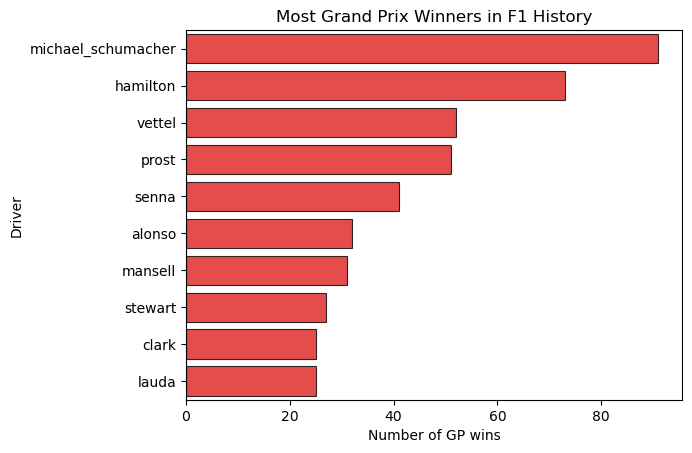

In [27]:
data_top10 = data_driver_all.head(10)
sns.barplot(data = data_top10, y = 'driver', x = 'position_order', color = "r" ,
           alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most Grand Prix Winners in F1 History')
plt.ylabel('Driver')
plt.xlabel('Number of GP wins');

In [28]:
print(data_top10)

               driver  position_order
0  michael_schumacher              91
1            hamilton              73
2              vettel              52
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


In [29]:
#Creating a New Dataframe of all GP Constructor Winners
data_cons_all = df.loc[df['position_order'] == 1].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

In [30]:
data_cons_all.head()

,constructor_name,position_order
0,Ferrari,236
1,McLaren,178
2,Williams,114
3,Mercedes,87
4,Red Bull,59


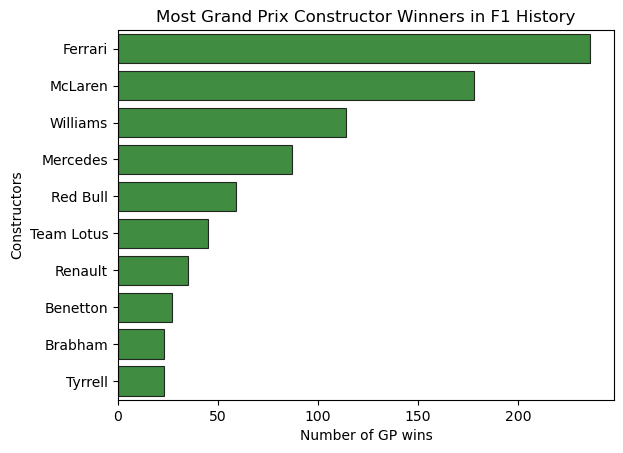

In [31]:
data_top10cons = data_cons_all.head(10)
sns.barplot(data = data_top10cons, y = 'constructor_name', x = 'position_order',
           color = "g" , alpha = 0.8, linewidth=.8, edgecolor="black")
plt.title('Most Grand Prix Constructor Winners in F1 History')
plt.ylabel('Constructors')
plt.xlabel('Number of GP wins');

In [32]:
print(data_top10cons)

  constructor_name  position_order
0          Ferrari             236
1          McLaren             178
2         Williams             114
3         Mercedes              87
4         Red Bull              59
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Starting position')

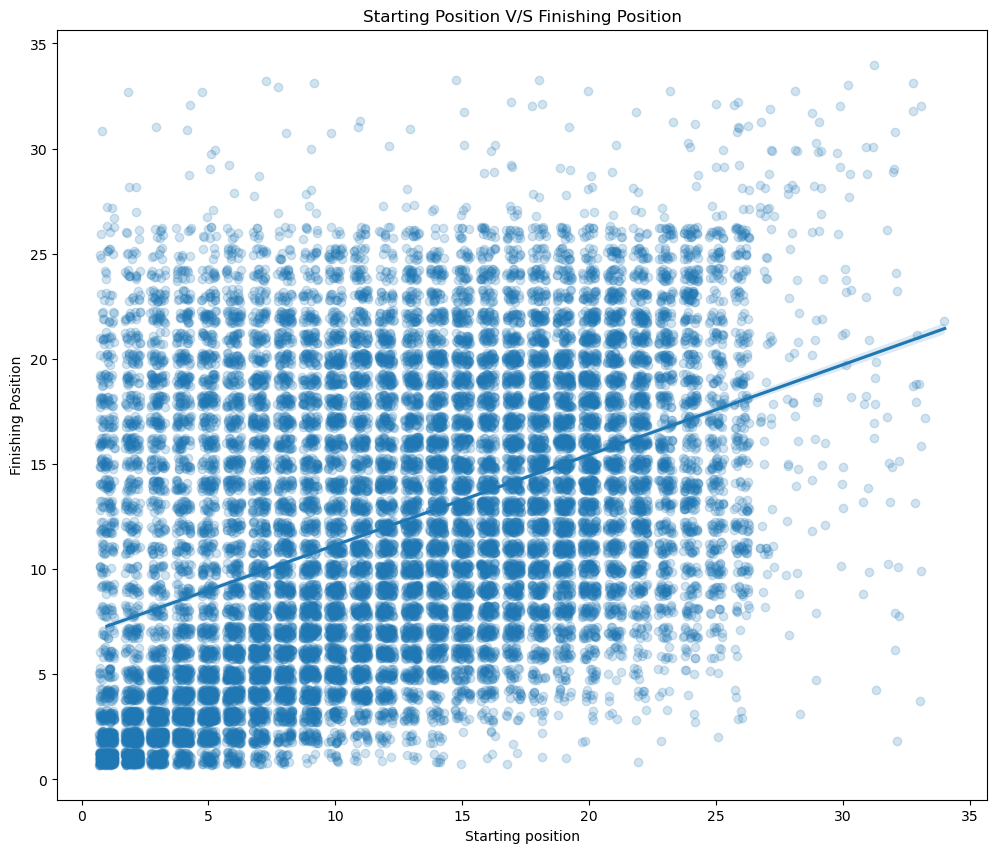

In [34]:
#Plotting a linear Regression Line in Starting Position and Finishing Position
df_no_zero = df[df['grid'] != 0]
plt.figure(figsize = [12, 10])
sns.regplot(data = df_no_zero, x = 'grid', y = 'position_order', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting Position V/S Finishing Position')
plt.ylabel('Finishing Position')
plt.xlabel('Starting position')

In [35]:
#Creating new Dataframe from 2004 season onwards
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

In [37]:
df_speed.head()

,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,3,1,25.0,29:33.3,5373283.0,4.0,01:26.5,220.782,2018,Australian Grand Prix,1,vettel,German,Ferrari,Italian
1,1,2,18.0,5.036,5378319.0,3.0,01:26.4,220.845,2018,Australian Grand Prix,1,hamilton,British,Mercedes,German
2,2,3,15.0,6.309,5379592.0,2.0,01:26.4,221.027,2018,Australian Grand Prix,1,raikkonen,Finnish,Ferrari,Italian
3,8,4,12.0,7.069,5380352.0,1.0,01:25.9,222.128,2018,Australian Grand Prix,1,ricciardo,Australian,Red Bull,Austrian
4,10,5,10.0,27.886,5401169.0,7.0,01:27.0,219.489,2018,Australian Grand Prix,1,alonso,Spanish,McLaren,British


In [38]:
df_group_speed.head()

,gp_name,year,fastest_lap_speed
0,Abu Dhabi Grand Prix,2009,198.041100
1,Abu Dhabi Grand Prix,2010,193.559045
2,Abu Dhabi Grand Prix,2011,189.779522
3,Abu Dhabi Grand Prix,2012,187.682739
4,Abu Dhabi Grand Prix,2013,189.595286


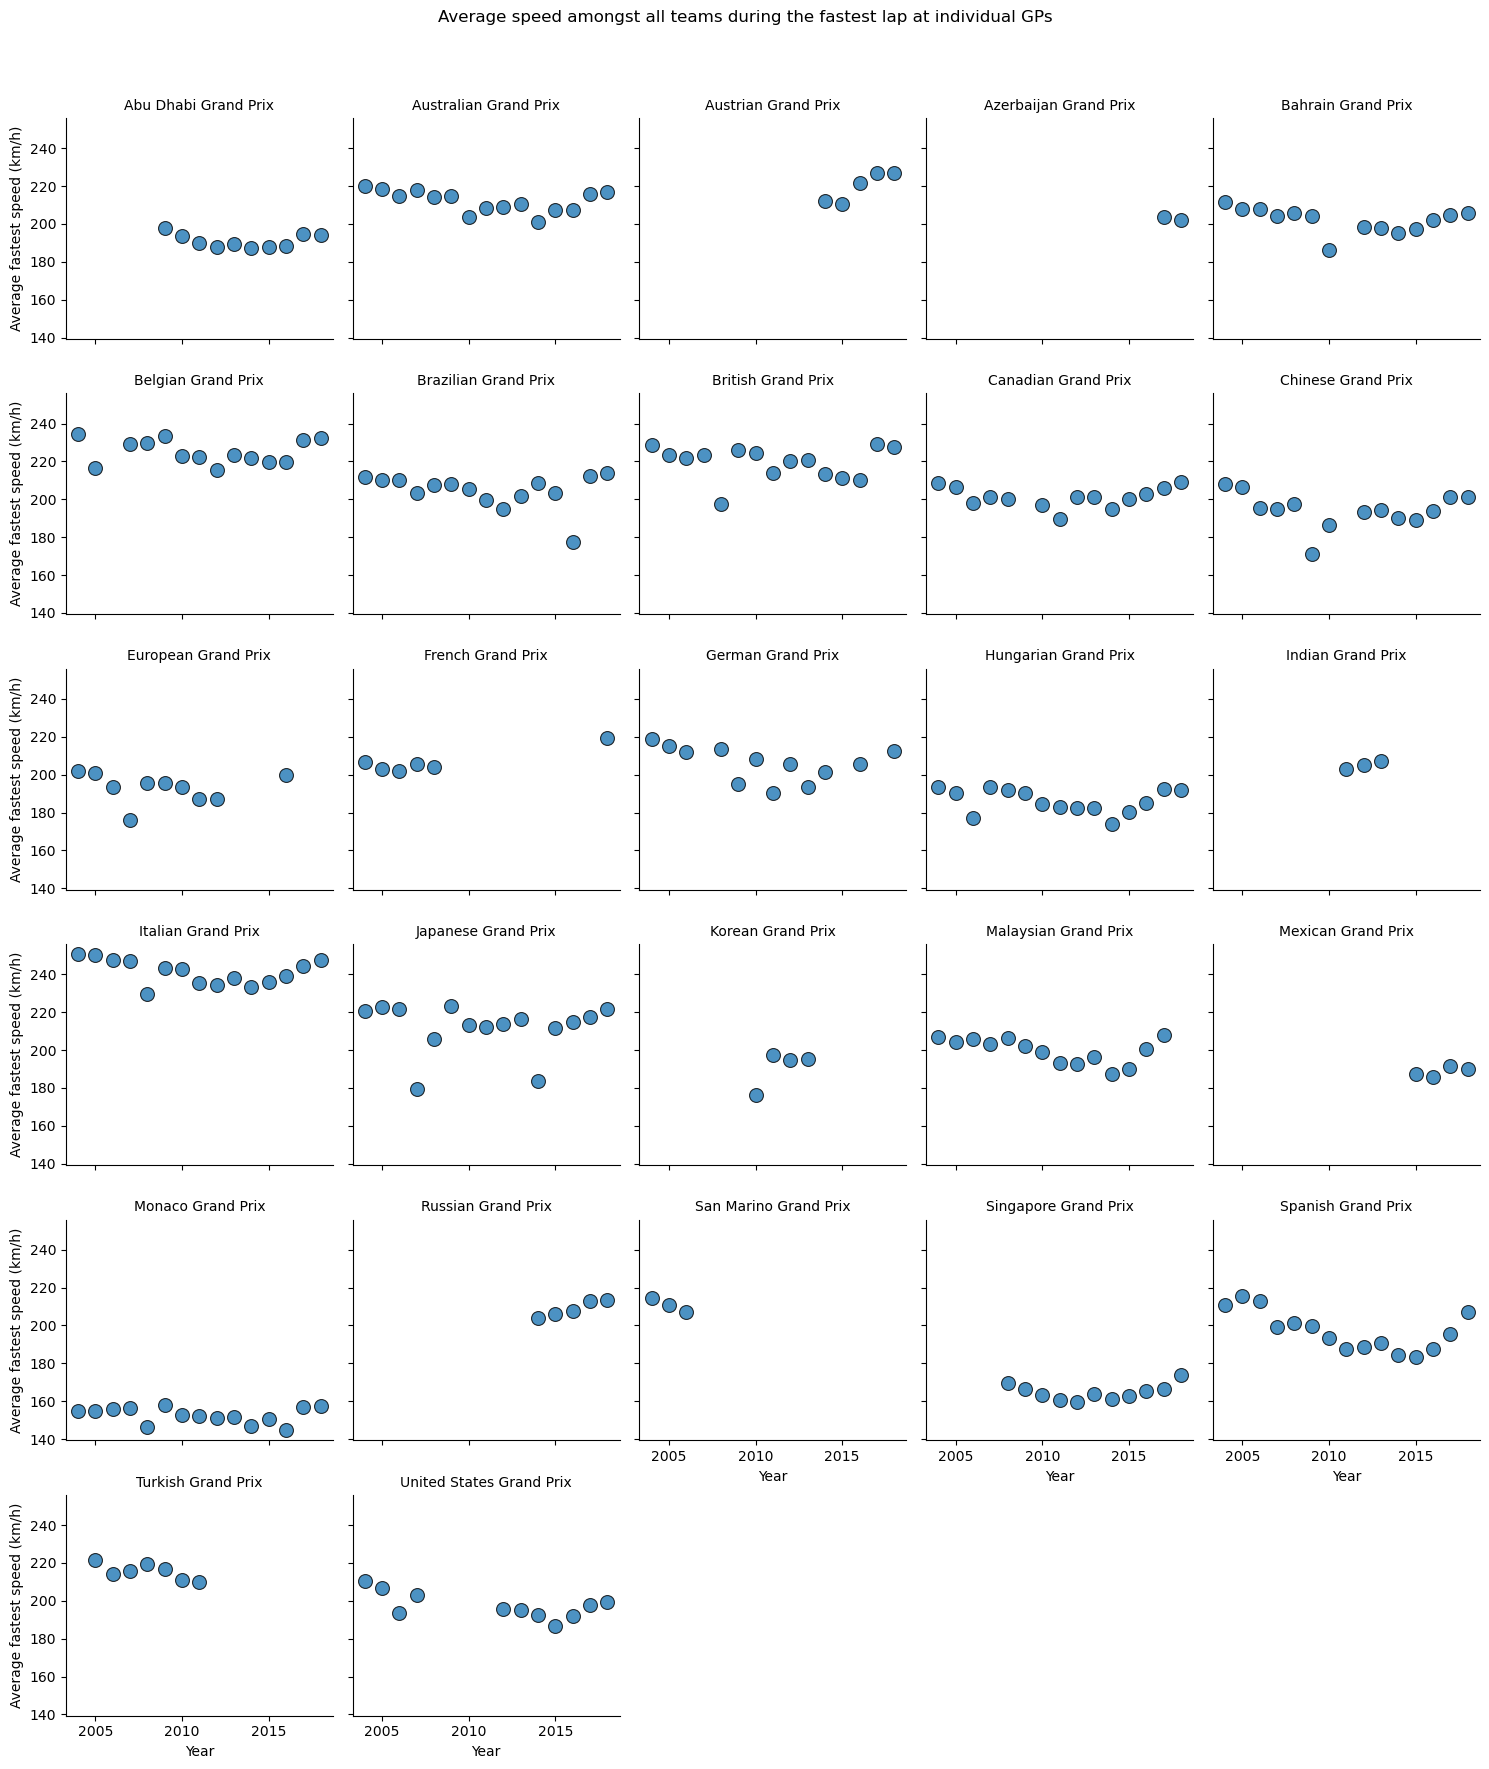

In [39]:
#Plotting a Facetgrid to see the average speed amongst all teams during the fastest lap at individual GPs
g = sns.FacetGrid(data = df_group_speed, col = 'gp_name',col_wrap=5)
g.map(plt.scatter, 'year','fastest_lap_speed', alpha = 0.8, linewidth=.8, edgecolor="black", s = 100 )
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');